<h1>14 Oct</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("libraries are loaded")


libraries are loaded


In [2]:
file_path = "https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/loan%20aproaval%20DL/loan_approval_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [4]:
df[' education'].value_counts().keys()

Index([' Graduate', ' Not Graduate'], dtype='object', name=' education')

In [5]:
file_path = "https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/loan%20aproaval%20DL/loan_approval_dataset.csv"
df = pd.read_csv(file_path, skipinitialspace=True)  #st.lstrip
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
df['education'].value_counts().keys()

Index(['Graduate', 'Not Graduate'], dtype='object', name='education')

In [7]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [9]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df['self_employed'].value_counts()

self_employed
Yes    2150
No     2119
Name: count, dtype: int64

In [12]:
self =df[df['self_employed']=='Yes']

In [13]:
self

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,4259,5,Graduate,Yes,9700000,22600000,16,346,23500000,12900000,26800000,13000000,Rejected
4259,4260,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected
4261,4262,3,Graduate,Yes,3000000,7500000,6,881,1400000,4500000,6100000,2300000,Approved
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected


In [14]:
not_self =df[df['self_employed']=='No']

In [15]:
not_self

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,4263,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected
4263,4264,3,Graduate,No,5000000,12700000,14,865,4700000,8100000,19500000,6300000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [16]:
self['loan_status'].value_counts()

loan_status
Approved    1338
Rejected     812
Name: count, dtype: int64

In [17]:
not_self['loan_status'].value_counts()

loan_status
Approved    1318
Rejected     801
Name: count, dtype: int64

In [18]:
grad = df[df['education']=='Graduate']

In [19]:
grad['loan_status'].value_counts()

loan_status
Approved    1339
Rejected     805
Name: count, dtype: int64

In [20]:
non_grad = df[df['education']=='Not Graduate']

In [21]:
non_grad['loan_status'].value_counts()

loan_status
Approved    1317
Rejected     808
Name: count, dtype: int64

In [22]:
cibil_gt750=df[df['cibil_score']>750]

In [23]:
cibil_gt750

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
15,16,5,Not Graduate,No,4700000,10700000,10,794,5700000,3900000,16400000,4400000,Approved
17,18,4,Not Graduate,Yes,2900000,9400000,14,780,2900000,2800000,6700000,4300000,Approved
29,30,3,Not Graduate,Yes,9000000,31500000,10,850,21800000,12400000,33700000,8000000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,4250,4,Graduate,No,1100000,4000000,14,887,2400000,1500000,4200000,1600000,Approved
4253,4254,5,Graduate,Yes,7000000,26200000,12,896,13100000,6600000,23600000,5700000,Approved
4261,4262,3,Graduate,Yes,3000000,7500000,6,881,1400000,4500000,6100000,2300000,Approved
4263,4264,3,Graduate,No,5000000,12700000,14,865,4700000,8100000,19500000,6300000,Approved


In [24]:
cibil_gt750['loan_status'].value_counts()

loan_status
Approved    1047
Rejected       6
Name: count, dtype: int64

In [25]:
cibil_gt750[cibil_gt750['loan_status']=='Rejected']

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
236,237,3,Graduate,Yes,900000,3500000,4,770,700000,0,2000000,600000,Rejected
559,560,2,Graduate,Yes,200000,500000,6,885,-100000,0,300000,200000,Rejected
911,912,0,Graduate,Yes,1300000,4800000,4,835,500000,100000,3300000,800000,Rejected
3213,3214,1,Not Graduate,Yes,4300000,16300000,14,792,400000,400000,10200000,4000000,Rejected
3527,3528,0,Graduate,No,1800000,6900000,10,853,900000,400000,3700000,1700000,Rejected
4099,4100,3,Graduate,No,8700000,31100000,16,760,400000,1800000,19300000,4800000,Rejected


In [26]:
#scatterplot (income_annum,loan_amount)

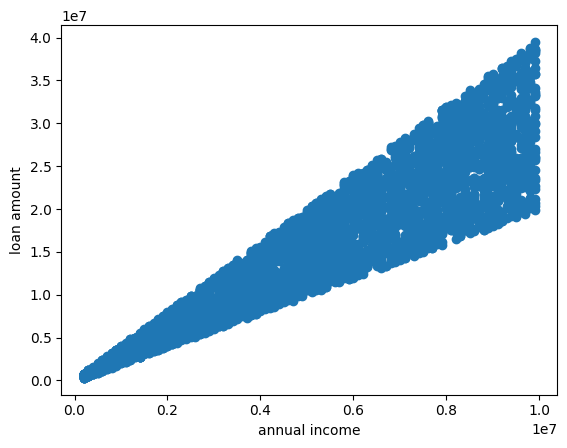

In [27]:
plt.scatter(x=df['income_annum'],y=df['loan_amount'])
plt.ylabel('loan amount')
plt.xlabel('annual income')
plt.show()

<Axes: xlabel='income_annum', ylabel='loan_amount'>

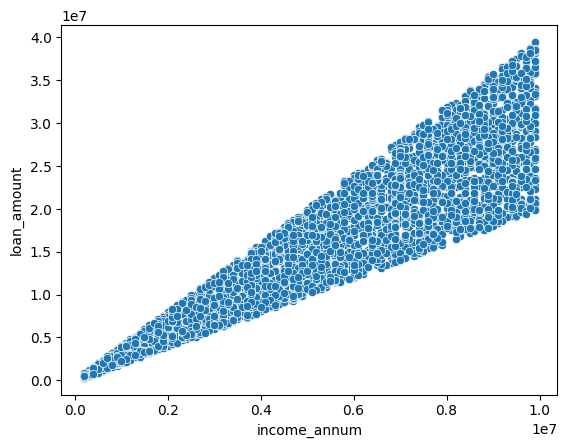

In [28]:
sns.scatterplot(x='income_annum',y='loan_amount',data=df)

<Axes: xlabel='income_annum', ylabel='loan_amount'>

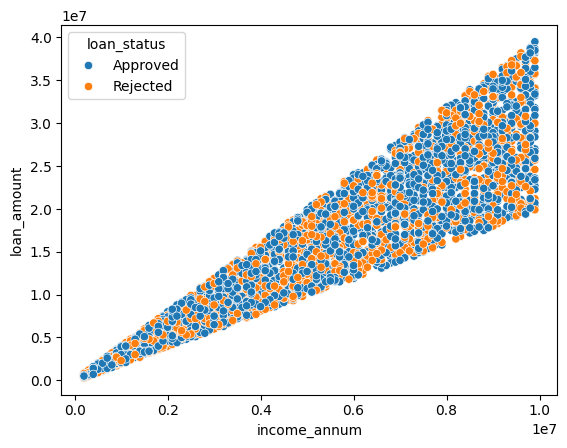

In [29]:
sns.scatterplot(x='income_annum',y='loan_amount',data=df,hue='loan_status')


<Axes: xlabel='loan_amount', ylabel='residential_assets_value'>

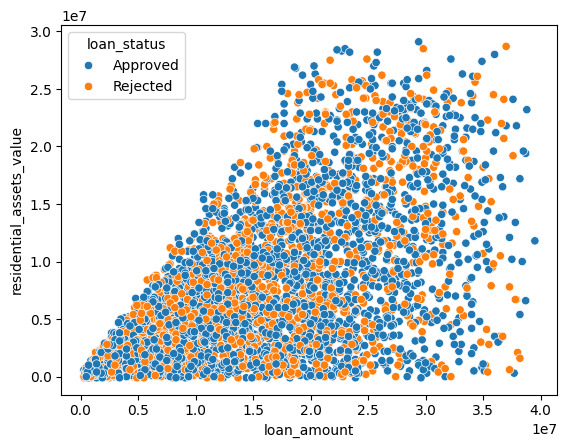

In [30]:
sns.scatterplot(x='loan_amount',y='residential_assets_value',data=df,hue='loan_status')


<Axes: xlabel='bank_asset_value', ylabel='luxury_assets_value'>

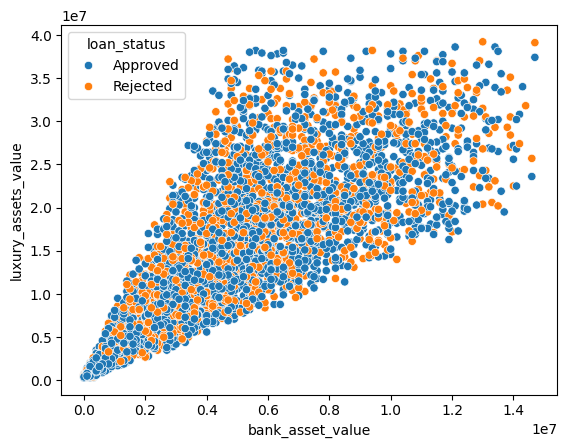

In [31]:
sns.scatterplot(x='bank_asset_value',y='luxury_assets_value',data=df,hue='loan_status')


In [32]:
df['loan_term'].value_counts()

loan_term
6     490
12    456
4     447
10    436
18    422
16    412
20    411
14    405
2     404
8     386
Name: count, dtype: int64

In [33]:
df2 = pd.get_dummies(df,drop_first=True).astype(int)  #onehot_encoding
df2.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes,loan_status_Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1


<h1>15 oct</h1>


In [34]:

## x and y

x = df2.drop(['loan_id','loan_status_Rejected'],axis='columns')
y = df2[['loan_status_Rejected']]

In [35]:
x

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,0,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,0


In [36]:
y

,loan_status_Rejected
0,0
1,1
2,1
3,1
4,1
...,...
4264,1
4265,0
4266,1
4267,0


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
## scale downing the data before passing to ann model
std_scalar = StandardScaler()
x_transformed = std_scalar.fit_transform(x)

In [39]:
## Train test split
## training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size=0.2,random_state=42)

In [40]:
import tensorflow

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
x_train.shape[1]

11

In [43]:
ann_model = Sequential()
ann_model.add(Dense(units=68,activation='relu',input_shape=(x_train.shape[1],)))
ann_model.add(Dense(units=32,activation='relu'))
ann_model.add(Dense(units=24,activation='relu'))

ann_model.add(Dense(units=1,activation='sigmoid'))

ann_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
ann_model.summary()

C:\Users\ashis\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 68)             │           816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,841 (15.00 KB)

 Trainable params: 3,841 (15.00 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = ann_model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6865 - loss: 0.5710 - val_accuracy: 0.9204 - val_loss: 0.2255
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9275 - loss: 0.2190 - val_accuracy: 0.9274 - val_loss: 0.1884
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9280 - loss: 0.2002 - val_accuracy: 0.9309 - val_loss: 0.1734
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9461 - loss: 0.1550 - val_accuracy: 0.9274 - val_loss: 0.1674
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9485 - loss: 0.1484 - val_accuracy: 0.9274 - val_loss: 0.1557
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9510 - loss: 0.1363 - val_accuracy: 0.9227 - val_loss: 0.1618
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9565 - loss: 0.1221 - val_accuracy: 0.9286 - val_loss: 0.1483
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9538 - loss: 0.1255 - val_accuracy: 0.

In [45]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.804392,0.433820,0.920375,0.225475
1,0.927672,0.206442,0.927400,0.188365
2,0.935286,0.181720,0.930913,0.173407
3,0.939678,0.167863,0.927400,0.167362
4,0.944070,0.152226,0.927400,0.155688
5,0.949048,0.140834,0.922717,0.161846
6,0.951391,0.134109,0.928571,0.148260
7,0.953441,0.125851,0.935597,0.129134
8,0.960176,0.113310,0.937939,0.129879
9,0.961347,0.107572,0.940281,0.132368


In [46]:
#prediction

prediction = ann_model.predict(x_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [47]:
x_test.shape

(854, 11)

In [48]:
prediction.shape

(854, 1)

In [49]:
pred = (prediction>0.5).astype(int).ravel()

In [50]:
pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,

In [51]:
y_test['predicted'] = pred

In [52]:
y_test.head(40)

,loan_status_Rejected,predicted
1703,1,1
1173,0,0
308,1,1
1322,0,0
3271,0,0
3539,0,0
1522,0,0
3399,1,1
1402,0,0
1829,1,1


In [53]:
from sklearn.metrics import confusion_matrix,classification_report

In [54]:
confusion_matrix(y_test['loan_status_Rejected'], y_test['predicted'])

array([[513,  23],
       [ 16, 302]], dtype=int64)

In [55]:
print(classification_report(y_test['loan_status_Rejected'], y_test['predicted']))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       536
           1       0.93      0.95      0.94       318

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854

